# Scatterplot
Een scatterplot wordt gebruikt om het verband aan te tonen tussen bepaalde eigenschappen. In dit voorbeeld kijken we naar het verband tussen Wiskundescore en Leesscore vs Schrijfscore in de Students performance dataset

In [1]:
from pathlib import Path
from zipfile import ZipFile
import requests
URL = "https://www.kaggle.com/api/v1/datasets/download/spscientist/students-performance-in-exams"
STUDENTS_EXAM_ZIP = "students_performance_in_exams.zip"
students_exam_path = Path(STUDENTS_EXAM_ZIP)
if not students_exam_path.exists():
    data = requests.get(URL)
    with open(STUDENTS_EXAM_ZIP, "wb") as f:
        f.write(data.content)
    with open(STUDENTS_EXAM_ZIP, "rb") as f:
        ZipFile(f).extractall()

## Dataset inlezen en bekijken

In [1]:
import pandas as pd
STUDENTS_CSV = "StudentsPerformance.csv"
df = pd.read_csv(STUDENTS_CSV, usecols=['math score', 'reading score', 'writing score', 'gender'], dtype={'gender':'category'})
df.head()

,gender,math score,reading score,writing score
0,female,72,72,74
1,female,69,90,88
2,female,90,95,93
3,male,47,57,44
4,male,76,78,75


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         1000 non-null   category
 1   math score     1000 non-null   int64   
 2   reading score  1000 non-null   int64   
 3   writing score  1000 non-null   int64   
dtypes: category(1), int64(3)
memory usage: 24.6 KB


In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Scattergrafiek maken


In [6]:
df['gender'].cat.codes

0      0
1      0
2      0
3      1
4      1
      ..
995    0
996    1
997    0
998    0
999    0
Length: 1000, dtype: int8

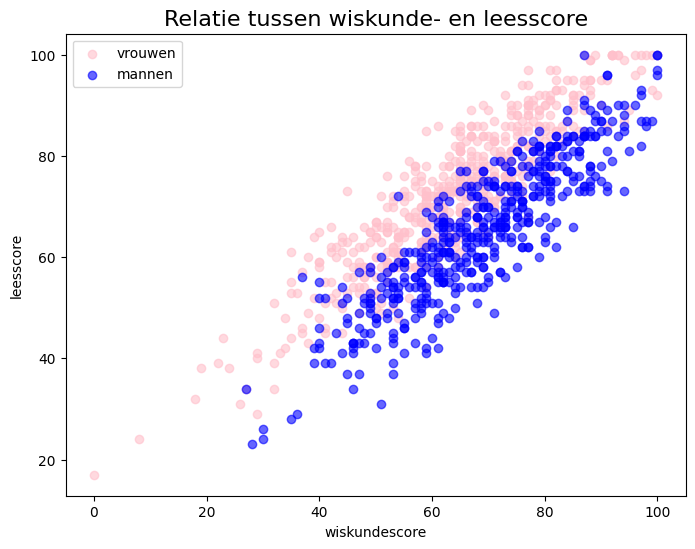

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df.loc[df['gender']=='female','math score'], df.loc[df['gender']=='female','reading score'],
            c='pink', label='vrouwen', alpha=0.6)
plt.scatter(df.loc[df['gender']=='male','math score'], df.loc[df['gender']=='male','reading score'],
            c='blue', label='mannen', alpha=0.6)
plt.xlabel('wiskundescore', fontsize=10)
plt.ylabel('leesscore', fontsize=10)
plt.title('Relatie tussen wiskunde- en leesscore', fontsize=16)
plt.legend()
plt.show()

## Scattergrafiek maken met colormap

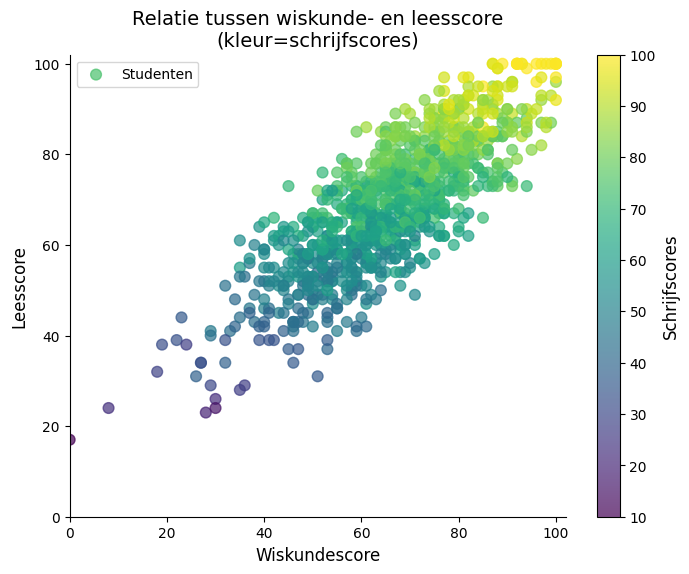

In [ ]:

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df["math score"], df["reading score"], c=df["writing score"], cmap='viridis', alpha=0.7, s=60, label="Studenten")
plt.xlabel("Wiskundescore", fontsize=12)
plt.ylabel("Leesscore", fontsize=12)
plt.title("Relatie tussen wiskunde- en leesscore\n(kleur=schrijfscores)", fontsize=14)
plt.xlim(0, 102)
plt.ylim(0, 102)
plt.legend()
cbar = plt.colorbar(scatter)
cbar.set_label('Schrijfscores', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()